# **Homework 9: Self-supervised learning for image classification using a pretext trained model**  

## Universidad de Monterrey  

### School of Engineering and Technologies  

**Virgilio Del Bosque Luna 578255 | Ingeniería en Mecatrónica**  
**Víctor Manuel Contreras González 625627 | Ingeniería en Mecatrónica**

**Marcelo Garza Rodríguez 583252 | Ingeniería en Gestión Empresarial**

**Course:** Artificial Intelligence II

**Lecturer:** Dr. Andrés Hernández Gutiérrez  
**Due date:** Monday 2 December 2024,
San Pedro Garza García, Nuevo León

"Damos nuestra palabra de que hemos realizado esta actividad con integridad académica"

Av. Ignacio Morones Prieto 4500 Poniente. Col. Jesús M. Garza San Pedro Garza García Nuevo León, México C. P. 66238


###**Learning objective**
This assignment focuses on implementing a self-supervised learning technique to pre-train a
deep learning model on a pretext task. Students will then transfer the learnt representations
to a target task for image classification. The assignment will allow students to understand the
principles of self-supervised learning, experiment with pretext tasks, and evaluate the performance
of the final model.

###**1. Dataset**

- **Pretext task**: use a publicly available dataset like ImageNet, CIFAR-10, etc., for training the pretext task model. (CIFAR-10)

- **Target task**: Use a different dataset such as Fashion-MNIST or another small labelled dataset for the image classification target task.(Fashion-MNIST)

Recuperado de  Tensorflow:

TensorFlow datasets. (n.d.). TensorFlow. https://www.tensorflow.org/datasets?hl=es





Shape of CIFAR-10 images: (50000, 32, 32, 3)


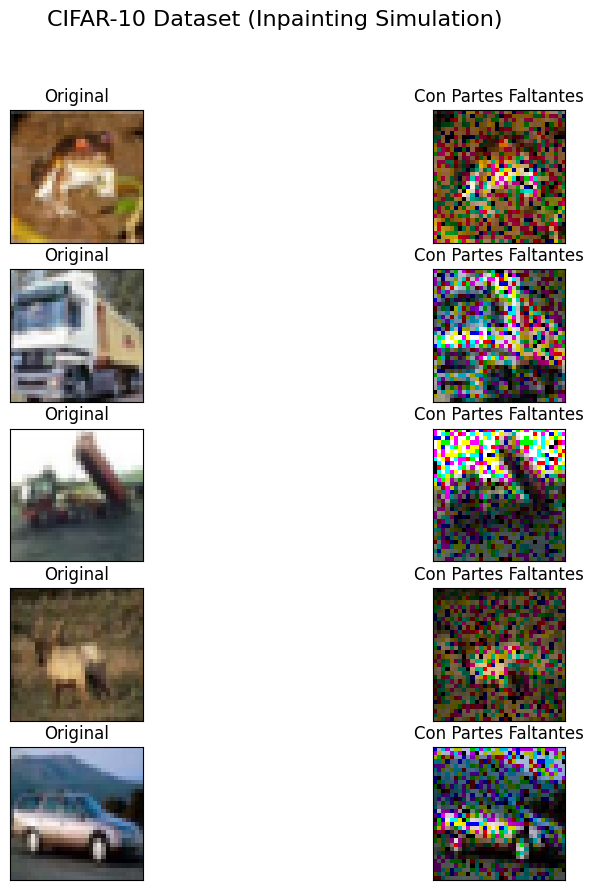

In [ ]:
#Código para la Pretext task (CIFAR-10)

import tensorflow as tf  # Biblioteca para trabajar con aprendizaje profundo
import numpy as np  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca para visualización gráfica

# Cargar el dataset CIFAR-10 (imágenes y etiquetas, aunque no usaremos etiquetas aquí)
(cifar_images, _), _ = tf.keras.datasets.cifar10.load_data()

# Normalizar las imágenes dividiendo cada píxel entre 255 (valores entre 0 y 1)
cifar_images = cifar_images / 255.0
print(f"Shape of CIFAR-10 images: {cifar_images.shape}")  # Validar dimensiones (32, 32, 3)

# Función para añadir "huecos" en las imágenes
def add_missing_parts(images, missing_fraction=0.3):

    np.random.seed(42)  # Semilla para reproducibilidad
    mask = np.random.rand(*images.shape) > missing_fraction  # Máscara aleatoria de píxeles visibles
    masked_images = images * mask  # Aplica la máscara a las imágenes
    return masked_images, mask  # Retorna las imágenes modificadas y las máscaras usadas

# Crear las imágenes con huecos (simulación de partes faltantes)
cifar_images_missing, cifar_masks = add_missing_parts(cifar_images)

# Función para visualizar imágenes originales y con huecos
def visualize_inpainting(images, images_missing, dataset_name):

    plt.figure(figsize=(10, 10))  # Tamaño de la figura
    for i in range(5):  # Muestra 5 pares de imágenes
        # Imagen original
        plt.subplot(5, 2, i * 2 + 1)  # Posición en la cuadrícula
        plt.xticks([])  # Sin ticks en el eje x
        plt.yticks([])  # Sin ticks en el eje y
        plt.grid(False)  # Sin cuadrícula
        plt.imshow(images[i])  # Muestra la imagen original
        plt.title("Original")  # Título de la imagen

        # Imagen con huecos
        plt.subplot(5, 2, i * 2 + 2)  # Posición en la cuadrícula
        plt.xticks([])  # Sin ticks en el eje x (valores de marcas)
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images_missing[i])  # Muestra la imagen con partes faltantes
        plt.title("Con Partes Faltantes")  # Título de la imagen con huecos
    plt.suptitle(f"{dataset_name} Dataset (Inpainting Simulation)", fontsize=16)  # Título general
    plt.show()  # Muestra la figura

# Llamar a la función para visualizar las imágenes procesadas
visualize_inpainting(cifar_images, cifar_images_missing, "CIFAR-10")


**Preparar y simular** imágenes con partes faltantes usando CIFAR-10, un conjunto de imágenes a color de 10 categorías.

**Carga de datos:** Se utiliza el dataset CIFAR-10, pero solo las imágenes, ya que las etiquetas no son necesarias.

**Normalización:** Se ajustan los valores de píxeles al rango [0, 1] para facilitar el entrenamiento.

**Simulación de partes faltantes:**
Se genera una máscara aleatoria para "eliminar" partes de las imágenes.
Las imágenes con huecos se crearán multiplicándolas por esta máscara.

**Visualización:** Se muestran pares de imágenes originales y con huecos para comparar.


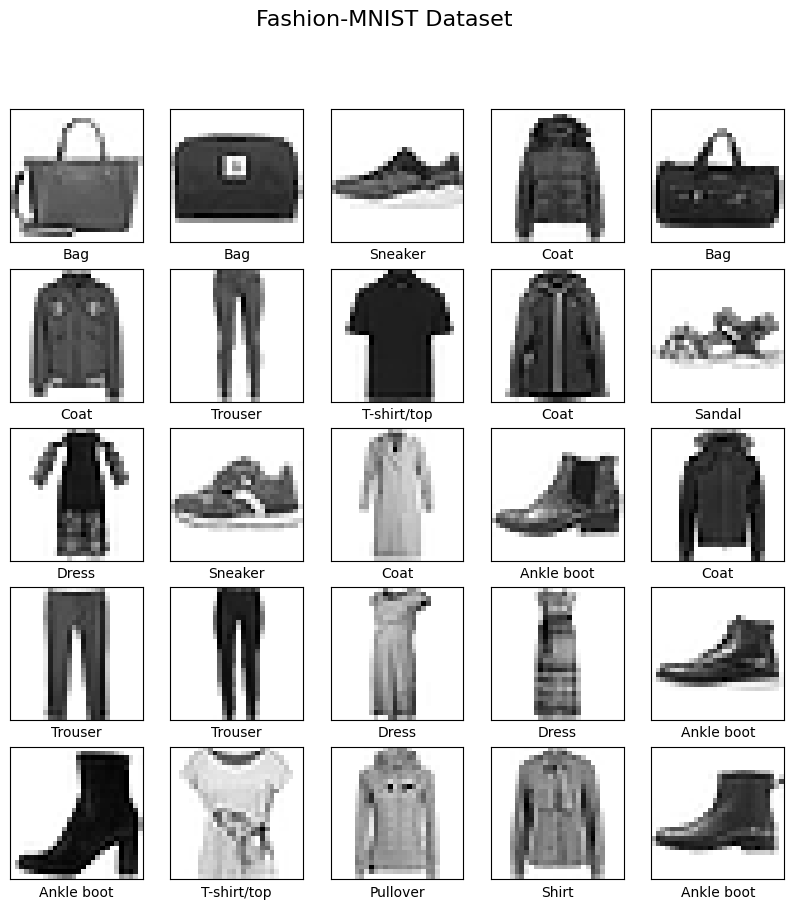

In [ ]:
#Código para target task (Fashion-MNIST)

import tensorflow as tf  # Biblioteca para aprendizaje profundo
import numpy as np  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt  # Biblioteca para visualización gráfica

# Cargar el dataset Fashion-MNIST (imágenes y etiquetas)
(fashion_images, fashion_labels), (fashion_test_images, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar las imágenes dividiendo cada píxel entre 255 (valores entre 0 y 1)
fashion_images = fashion_images / 255.0
fashion_test_images = fashion_test_images / 255.0  # También normaliza el conjunto de prueba

# Lista de nombres de las clases en Fashion-MNIST
fashion_class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Función para visualizar imágenes junto con sus etiquetas
def visualize_fashion(images, labels, class_names, dataset_name):

    assert len(images) == len(labels), "El número de imágenes no coincide con el número de etiquetas"  # Validación

    np.random.seed(42)  # Semilla para reproducibilidad
    indices = np.random.choice(len(images), size=25, replace=False)  # Selección aleatoria de imágenes

    plt.figure(figsize=(10, 10))  # Tamaño de la figura
    for i, idx in enumerate(indices):  # Iterar sobre índices seleccionados
        plt.subplot(5, 5, i + 1)  # Posición en la cuadrícula 5x5
        plt.xticks([])  # Sin ticks en el eje x (valores de marcas)
        plt.yticks([])  # Sin ticks en el eje y
        plt.grid(False)  # Sin cuadrícula
        plt.imshow(images[idx], cmap=plt.cm.binary)  # Muestra la imagen en escala de grises
        plt.xlabel(class_names[labels[idx]])  # Etiqueta de la clase
    plt.suptitle(f"{dataset_name} Dataset", fontsize=16)  # Título general
    plt.show()  # Muestra la figura

# Llamar a la función para visualizar las imágenes de Fashion-MNIST
visualize_fashion(fashion_images, fashion_labels, fashion_class_names, "Fashion-MNIST")

**Preparar el dataset** etiquetado Fashion-MNIST para la tarea de clasificación de imágenes.

**Carga de datos:** Se obtiene el dataset Fashion-MNIST, que contiene imágenes de ropa y accesorios.

**Normalización:** Los valores de píxeles se ajustan al rango [0, 1].

**Etiquetas:** Se asignan nombres a las clases (e.g., "T-shirt/top", "Sneaker").

**Visualización:** Se muestran 25 imágenes con sus etiquetas para entender las categorías del dataset.

###**2. Pretext task selection**

– **Team 2**: Image inpainting, by predicting missing parts of an image.

El image inpainting es una rama importante de la visión artificial, ampliamente utilizada en la edición de imágenes y el retoque fotográfico, entre otros usos.(Zhang et al., 2022)

Según el artículo "Image Inpainting Based on Deep Learning: A Review", los algoritmos tradicionales de image inpainting suelen enfrentar dificultades significativas al tratar con la eliminación de grandes áreas en las imágenes. Esto se debe a que son propensos a generar resultados con semántica inconsistente.(Zhang et al., 2022)

El image inpainting se basa en varios elementos clave, entre los que se destacan:
1.	Modelos generativos
2.	Priors de dominio
3.	Optimización
4.	Evaluación de calidad


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


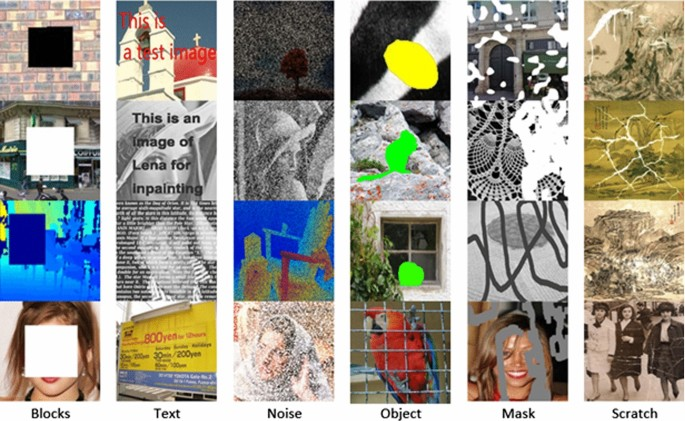

Figura 1. Image Inpainting (Elharrouss et al., 2019)


In [ ]:
from IPython.display import Image, display
imagen = '/content/drive/Shareddrives/Inteligenia/inp.jpg'
display(Image(filename=imagen, width=500, height=300))
print('Figura 1. Image Inpainting','(Elharrouss et al., 2019)') #

###**3. Self-Supervised learning workflow**
####**Pretext task**
– Build and train a deep learning model on the selected pretext task using an unlabelled dataset - your Python code will do so for you.

– Ensure the training process is analysed by visualising the plots of the learning curves
(accuracy / loss) for both the training and validation sets.


In [ ]:
import tensorflow as tf  # Biblioteca para trabajar con aprendizaje profundo
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preparar el dataset CIFAR-10
(cifar_images, _), _ = tf.keras.datasets.cifar10.load_data()  # Cargar imágenes del dataset CIFAR-10
cifar_images = cifar_images / 255.0  # Normalizar al rango [0, 1] dividiendo cada píxel por 255

# Generar imágenes con partes faltantes
def add_missing_parts(images, missing_fraction=0.3):

    mask = np.random.rand(*images.shape) > missing_fraction  # Máscara binaria para simular partes faltantes
    masked_images = images * mask  # Multiplicar la imagen por la máscara para aplicar los huecos
    return masked_images, mask  # Devolver las imágenes corruptas y las máscaras

cifar_images_missing, cifar_masks = add_missing_parts(cifar_images)  # Crear imágenes corruptas

# Crear un modelo mejorado de Image Inpainting
def create_inpainting_model(input_shape):

    model = models.Sequential([  # Crear un modelo secuencial
        # Primer bloque convolucional
        layers.Conv2D(64, (3, 3), activation='linear', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.Conv2D(64, (3, 3), activation='linear', padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2, 2)),  # Reduce a (16, 16, 64)
        layers.Dropout(0.2),

        # Segundo bloque convolucional
        layers.Conv2D(128, (3, 3), activation='linear', padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.Conv2D(128, (3, 3), activation='linear', padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.UpSampling2D((2, 2)),  # Restaura a (32, 32, 128)
        #Restaura la resolución perdida.
        layers.Dropout(0.2),

        # Capa de salida
        layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Reconstrucción final
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)  # Learning rate más bajo
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])  # Configurar el modelo
    return model  # Retornar el modelo definido

# Entrenar el modelo de Inpainting
input_shape = cifar_images_missing.shape[1:]  # Obtener las dimensiones de entrada (32, 32, 3)
inpainting_model = create_inpainting_model(input_shape)  # Crear el modelo

# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con imágenes corruptas y sus originales como etiquetas
history = inpainting_model.fit(
    cifar_images_missing, cifar_images,  # Entrenamiento con entrada corrupta y salida original
    epochs=20, batch_size=64, validation_split=0.2,  # Configuración de entrenamiento
    callbacks=[early_stopping]  # Monitorear el sobreajuste
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5708 - loss: 0.0141 - val_accuracy: 0.7688 - val_loss: 0.0031
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7041 - loss: 0.0042 - val_accuracy: 0.7959 - val_loss: 0.0023
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7501 - loss: 0.0031 - val_accuracy: 0.8096 - val_loss: 0.0018
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7776 - loss: 0.0026 - val_accuracy: 0.8435 - val_loss: 0.0015
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7915 - loss: 0.0023 - val_accuracy: 0.8415 - val_loss: 0.0013
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8006 - loss: 0.0021 - val_accuracy: 0.8337 - val_loss: 0.0012
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8043 - loss: 0.0020 - val_accuracy: 0.8369 - val_loss: 0.0016
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8074 - loss: 0.0020 - 

En esta celda, trabajamos con el dataset CIFAR-10 para simular un problema de reconstrucción de imágenes. Primero, generamos una versión corrupta de las imágenes originales, aplicándoles huecos aleatorios. Luego, definimos un modelo de aprendizaje profundo basado en redes convolucionales para aprender a reconstruir estas imágenes. Durante el entrenamiento, las imágenes corruptas se utilizan como entrada y las originales como etiquetas. Finalmente, visualizamos las curvas de aprendizaje para analizar la pérdida durante el entrenamiento y la validación.

Leaky Relu: evita el problema de "neuronas muertas" que puede ocurrir con ReLU, donde un nodo deja de actualizarse si su gradiente es siempre 0.

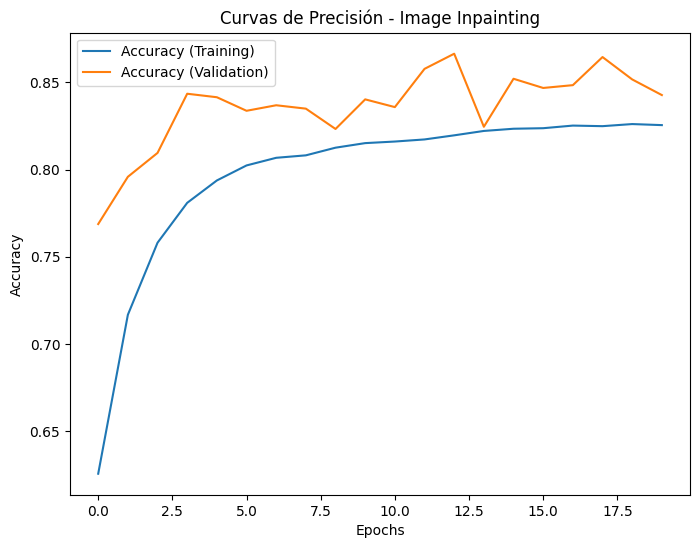

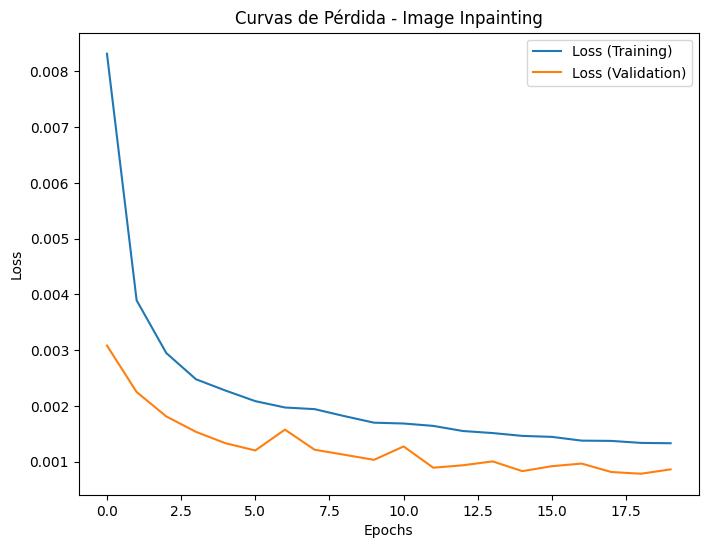

In [ ]:
# Graficar las curvas de aprendizaje
plt.figure(figsize=(8, 6)) #Tamaño de las gráficas
plt.plot(history.history['accuracy'], label='Accuracy (Training)') #Se grafica la curva de aprendizaje del entrenamiento
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)') #Se grafica la curva de aprendizaje de validación
plt.title('Curvas de Precisión - Image Inpainting') #Se establece el titulo para el grafico
plt.xlabel('Epochs') #Se establece un titulo para el eje x
plt.ylabel('Accuracy') #Se establece un titulo para el eje y
plt.legend() #Se agrega una leyenda para el grafico
plt.show() #Se muestra el grafico

plt.figure(figsize=(8, 6)) #Se define el tamaño de la grafica
plt.plot(history.history['loss'], label='Loss (Training)') #Se grafica la curva de perdida para el conjunto entrenamiento
plt.plot(history.history['val_loss'], label='Loss (Validation)') #Se grafica la curva de perdida para el conjunto de validación
plt.title('Curvas de Pérdida - Image Inpainting') #Se agrega un titulo a la grafica
plt.xlabel('Epochs') #Se define un titulo para el eje x
plt.ylabel('Loss') #Se define un titulo para el eje y
plt.legend() #Se define una leyenda para el grafico
plt.show() #Se muestra la grafica

# Guardar el modelo
inpainting_model.save('inpainting_model.h5')

**Análisis de gráfica:**

*La primera gráfica hace referencia a la curva de precisión que siguieron los conjuntos de entrenamiento y validación a lo largo de las épocas en las que fueron entrenadas, podemos observar una alza en ambas líneas a lo largo de las epocas lo que nos indica que el modelo se esta ejecutando de manera apropiada, podemos observar que la curva del conjunto de validación termina por encima de la del conjunto de entrenamiento lo cuál es un indicador de que el modelo no presenta sobre ajustes, así mismo vemos que el modelo termina con un accuracy cercano a 85, a inclusive nos permite observar que existen puntos en el entrenamiento donde se supera este número ligeramente pero que sin embargo la distancia entre las líneas en esos puntos es mayor por lo que no representaria una mejora en el modelo.*


*De acuerdo con lo observado en la segunda gráfica de las observadas anteriormente, podemos concluir que el modelo no está presentando sub o sobre ajuste, esto al observar que ambas líneas se mantienen constantes y en valores bajos hacia el final de las épocas, además, nos permite observar que apartir de la época (13) aproximadamente el cambio en la perdida para ambos conjuntos es prácticamente nulo, lo que nos pudiera permitir reducir costos bajando el número de épocas.*

En esta celda, trabajamos con el dataset CIFAR-10 para simular un problema de reconstrucción de imágenes. Primero, generamos una versión corrupta de las imágenes originales, aplicándoles huecos aleatorios. Luego, definimos un modelo de aprendizaje profundo basado en redes convolucionales para aprender a reconstruir estas imágenes. Durante el entrenamiento, las imágenes corruptas se utilizan como entrada y las originales como etiquetas. Finalmente, visualizamos las curvas de aprendizaje para analizar la pérdida durante el entrenamiento y la validación.

####**Transfer learning**
– Use the pre-trained model (you may wish to remove the top layers) from the pretext task as the base model for the target image classification task.

– Add additional layers (play around with it) for the classification task and fine-tune the model on the labelled dataset.

Comentarios:
En esta sección, donde se aplica transfer learning, se tuvieron muchos problemas para heredar o tranferir correctamente el primer modelo entrenado, por lo que se construyó uno nuevo para efectos de este bloque de código. La metodología es la misma, y, como se verá más adelante, se logró transferir el modelo como las primeras capas de un segundo modelo el cual utiliza el primer modelo como parte de su análisis de datos.

In [ ]:
from tensorflow.image import resize
from tensorflow.keras import layers, models

# Convertir imágenes de escala de grises a RGB
fashion_images_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(fashion_images, axis=-1))
fashion_test_images_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(fashion_test_images, axis=-1))

# Redimensionar las imágenes de Fashion-MNIST a 32x32
fashion_images_resized = resize(fashion_images_rgb, (32, 32))
fashion_test_images_resized = resize(fashion_test_images_rgb, (32, 32))

# Crear un modelo funcional de inpainting como pretext task
def create_inpainting_model(input_shape):

    inputs = tf.keras.Input(shape=input_shape)  # Definir capa de entrada
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

# Crear el modelo preentrenado (pretext task)
input_shape = (32, 32, 3)  # CIFAR-10 y las imágenes redimensionadas de Fashion-MNIST son (32, 32, 3)
inpainting_model = create_inpainting_model(input_shape)

# Crear un modelo de clasificación basado en el modelo preentrenado
base_model = tf.keras.Model(inputs=inpainting_model.input, outputs=inpainting_model.layers[-2].output)  # Modelo preentrenado sin la última capa
base_model.trainable = False  # Congelar capas preentrenadas

# Agregar capas de clasificación
classification_model = models.Sequential([
    base_model,  # Modelo base preentrenado
    layers.Flatten(),  # Aplanar las características
    layers.BatchNormalization(),  # Estabilización del aprendizaje
    layers.Dense(128, activation='relu'),  # Capa densa intermedia
    layers.Dropout(0.5),  # Regularización
    layers.Dense(10, activation='softmax')  # Salida para 10 clases
])

# Compilar el modelo
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validar dimensiones de las imágenes
print(f"Fashion-MNIST resized shapes: {fashion_images_resized.shape}, {fashion_test_images_resized.shape}")
print(classification_model.summary())  # Mostrar el resumen del modelo

Fashion-MNIST resized shapes: (60000, 32, 32, 3), (10000, 32, 32, 3)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_432 (Functional)          │ (None, 32, 32, 128)         │         260,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 131072)              │         524,288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,563,082 (67.00 MB)

 Trainable params: 17,040,778 (65.01 MB)

 Non-trainable params: 522,304 (1.99 MB)

None


En esta celda, utilizamos las representaciones aprendidas del modelo de reconstrucción como base para una tarea de clasificación. Congelamos las capas del modelo preentrenado y añadimos nuevas capas densas para realizar clasificación en el dataset Fashion-MNIST. Este proceso aprovecha el conocimiento aprendido previamente en el inpainting para mejorar la tarea de clasificación. Al final, graficamos las curvas de precisión para evaluar el rendimiento del modelo en los conjuntos de entrenamiento y validación.








Se realizaron unas correcciones para la correcta ejecución del código:

**Conversión a RGB:** Las imágenes de Fashion-MNIST (1 canal) se expandieron a 3 canales para que coincidan con el modelo preentrenado.

**Redimensionar imágenes:** Las imágenes de Fashion-MNIST (28x28) se redimensionaron a 32x32, el tamaño esperado por el modelo preentrenado.

**Compatibilidad del flujo:** Se aseguraron dimensiones consistentes entre las capas del modelo y las entradas/salidas.

####**Target model training**
– Train the target model on the labelled dataset and visualise the learning curves

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.6637 - loss: 3.5841 - val_accuracy: 0.8069 - val_loss: 0.5784
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7284 - loss: 0.7752 - val_accuracy: 0.8358 - val_loss: 0.5007
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7490 - loss: 0.6907 - val_accuracy: 0.8549 - val_loss: 0.4297
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7684 - loss: 0.6418 - val_accuracy: 0.8585 - val_loss: 0.4231
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7862 - loss: 0.6027 - val_accuracy: 0.8633 - val_loss: 0.4057
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7935 - loss: 0.5736 - val_accuracy: 0.8735 - val_loss: 0.3906
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8079 - loss: 0.5354 - val_accuracy: 0.8781 - val_loss: 0.3785
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8128 - loss: 0.5164 - val

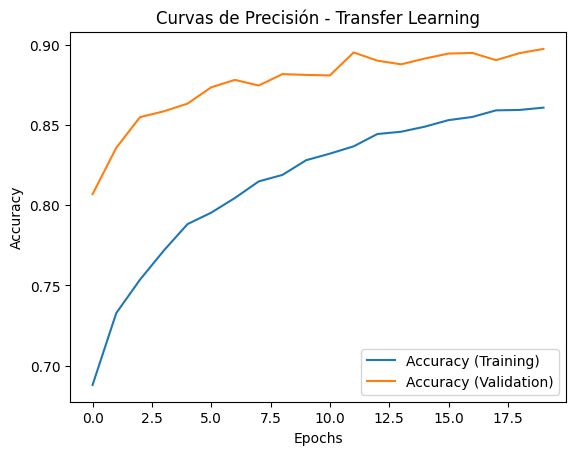

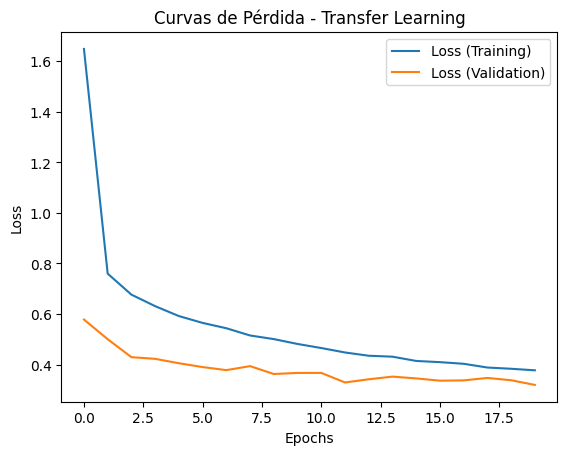

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8948 - loss: 0.3255
Test Loss: 0.32000523805618286
Test Accuracy: 0.8974000215530396


In [ ]:
# Definir hiperparámetros
epochs = 20 #Se define el numéro de epocás
batch_size = 64 #Se define el tamaño de lote

# Entrenar el modelo de clasificación
history_cls = classification_model.fit(
    fashion_images_resized, fashion_labels,  # Imágenes redimensionadas y etiquetas de entrenamiento
    epochs=epochs, batch_size=batch_size, validation_data=(fashion_test_images_resized, fashion_test_labels)  # Validación
)

# Graficar las curvas de precisión
plt.plot(history_cls.history['accuracy'], label='Accuracy (Training)') #Se grafica la curva de accuracy de entrenamiento
plt.plot(history_cls.history['val_accuracy'], label='Accuracy (Validation)') #Se grafica la curva de accuracy de validación
plt.title('Curvas de Precisión - Transfer Learning') #Se agrega un titulo a la gráfica
plt.xlabel('Epochs') #Se nombra el eje x
plt.ylabel('Accuracy') #Se nombra el eje y
plt.legend()
plt.show() #Se visualiza la grafica

# Graficar las curvas de pérdida
plt.plot(history_cls.history['loss'], label='Loss (Training)') #Se grafica la perdida de entrenamiento
plt.plot(history_cls.history['val_loss'], label='Loss (Validation)') #Se grafica la perdida de validación
plt.title('Curvas de Pérdida - Transfer Learning') #Se agrega un titulo a la gráfica
plt.xlabel('Epochs') #Se nombra el eje x
plt.ylabel('Loss') #Se nombra el eje y
plt.legend()
plt.show() #Se visualiza la grafica

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = classification_model.evaluate(fashion_test_images_resized, fashion_test_labels) #Se evalua el modelo para obtener la perdida y accuracy
print(f"Test Loss: {test_loss}") #Se imprime el valor de la perdida
print(f"Test Accuracy: {test_accuracy}") #Se imprime el valor del accuracy

**Análisis de las gráficas**

*De la misma manera que en el modelo preentrenado, las graficas anteriores presentan las curvas de acurracy y perdida del nuevo modelo, concluimos que el modelo no presenta un sobre ajuste, y se comporta de manera muy similar a las gráficas que presento el modelo pre entrenado, sin embargo, en este caso, se logra obtener un accuracy superior, logrando casi un 90%, que aunque se logra apreciar una mayor separación entre la linea del conjunto de entrenamiento y el de la validación, esta no supera una diferencia del 10% por lo que se puede confirmar que el modelo no esta sobre ajustando*


####**Prediction and evaluation**
– Use the test set to make predictions with the trained target model.

– Compute the following performance metrics for the test set:

∗ Accuracy

∗ Precision

∗ Recall

∗ Specificity

∗ F1-score

– Include a code cell that visualises a test image with their true label and predicted label for comparison.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8974
Precision: 0.9003966503180565
Recall: 0.8974
F1-score: 0.8984646019915555
Specificity per class: [0.827 0.964 0.866 0.88  0.806 0.966 0.758 0.974 0.973 0.96 ]
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.83      0.87      0.85      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.84      0.81      0.82      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.68      0.76      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



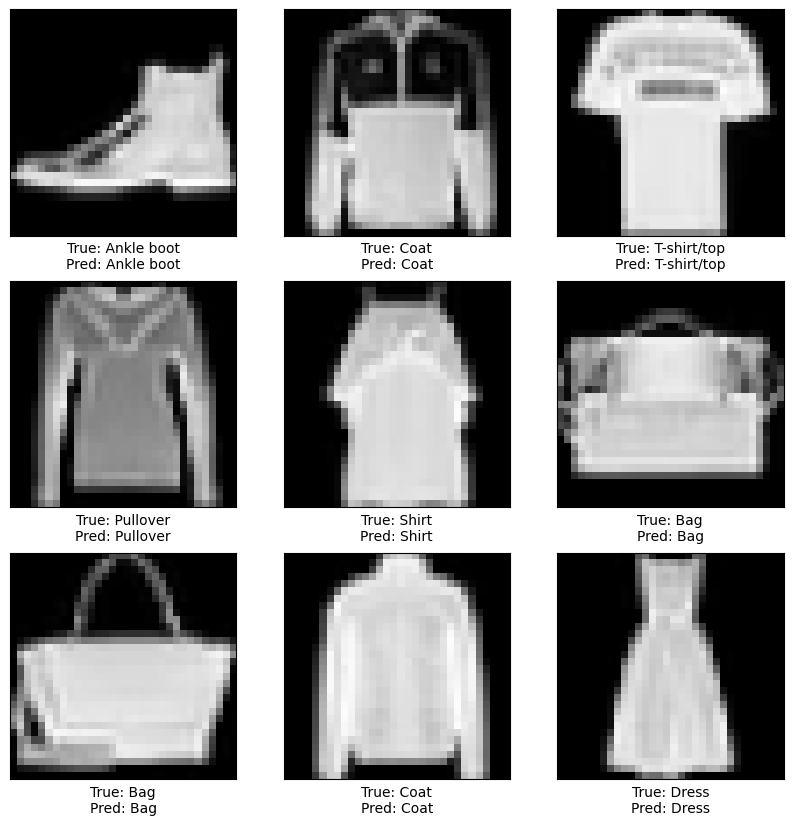

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
predictions = np.argmax(classification_model.predict(fashion_test_images_resized), axis=1)

# Calcular métricas
accuracy = accuracy_score(fashion_test_labels, predictions)
precision = precision_score(fashion_test_labels, predictions, average='weighted')
recall = recall_score(fashion_test_labels, predictions, average='weighted')
f1 = f1_score(fashion_test_labels, predictions, average='weighted')

# Reporte detallado
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calcular Specificity
cm = confusion_matrix(fashion_test_labels, predictions)
specificity_per_class = cm.diagonal() / cm.sum(axis=1)  # Especificidad por clase
print(f"Specificity per class: {specificity_per_class}")

# Reporte de clasificación
report = classification_report(fashion_test_labels, predictions, target_names=fashion_class_names)
print(report)

# Visualizar predicciones
def visualize_predictions(images, true_labels, pred_labels, class_names):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(len(images), size=9, replace=False)  # Selección aleatoria
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap=plt.cm.binary)
        true_class = class_names[true_labels[idx]]
        pred_class = class_names[pred_labels[idx]]
        plt.xlabel(f"True: {true_class}\nPred: {pred_class}")
    plt.show()

visualize_predictions(fashion_test_images_resized, fashion_test_labels, predictions, fashion_class_names)

**Interpretación**

*De los resultados obtenidos anteriormente, podemos concluir que el modelo tiene un valor de accuracy muy cercano al 90%, lo que refleja que se tiene un muy buen modelo. Observamos que la precisión para cada prenda ronda entre el 87% y el 99%, a excepción de las camisas, que baja hasta un 68%. Esto podría deberse a la gran variedad de tipos de camisas que existen, sobre todo en las camisas para mujer.*

*Para confirmar lo mencionado anteriormente, visualizamos las predicciones y logramos observar que el modelo logra nombrar correctamente todas las prendas, a excepción de la que se encuentra en la posición 2,2, la cual justamente se trata de una camisa pero el modelo la identifica como vestido. Este no parece ser un error muy grave, ya que incluso para nosotros podría llegar a ser complicado categorizar esa imagen*

###**Link a video:**


###**4. Provide personal conclusions**

**Virgilio:**
En esta tarea pusimos a prueba los conocimientos adquiridos en clase, enfocándonos en el desarrollo de un ejercicio práctico para Self-Supervised Learning (SSL). Elegimos una base de datos incompleta de imágenes, sobre la cual transferimos el conocimiento a una tarea de clasificación de imágenes de ropa ya etiquetadas. Esta actividad resultó muy enriquecedora, ya que nos permitió aplicar lo aprendido en clase y experimentar cómo funciona un código para una tarea de SSL. Además, utilizamos estructuras previamente estudiadas, como redes neuronales convolucionales, técnicas de normalización y otras estrategias para mejorar el modelo.

Las métricas obtenidas fueron aceptables, aunque no ideales, lo cual es entendible considerando que estamos iniciando en el uso de SSL. Espero que en futuras clases o en proyectos se profundice más en este tipo de enfoques, ya que considero que tienen un gran potencial para resolver problemas específicos y avanzar en el desarrollo de modelos más robustos.



**Víctor:**
En esta tarea desarrollamos un caso de aprendizaje auto-supervisado, comenzando con una tarea previa de reconstrucción de imágenes incompletas (pretext task) utilizando el dataset CIFAR-10, y después de transfirió ese conocimiento adquirido a una tarea de clasificación de imágenes de ropa (target task) con el dataset Fashion-MNIST. Aprendí cómo un modelo puede ser preentrenado para resolver un problema específico y luego adaptarse a otro distinto, optimizando tiempo y recursos.

Además, profundizamos en el uso de arquitecturas convolucionales, técnicas como BatchNormalization y Dropout para estabilizar el entrenamiento y prevenir sobreajuste, y en la importancia de las métricas de evaluación para analizar el desempeño del modelo. Este proyecto me permitió explorar cómo transferir conocimiento entre tareas y la importancia de experimentar con configuraciones para lograr un buen balance entre precisión y generalización. Aunque hubo desafíos al ajustar los hiperparámetros, el ejercicio fue valioso para entender el impacto de las decisiones en la construcción de los modelos.

**Marcelo**
A través de este proyecto, logré aplicar de primera mano los conocimientos obtenidos durante las clases de Transfer learning, entendí de primera mano la importancia de realizar este tipo de técnicas para lograr optimizar recursos y tiempo, y, a pesar de que era algo que vimos en clase, logré aterrizar el concepto de como un modelo se puede pre entrenar para X tarea, y ese mismo modelo se puede utilizar para una completamente diferente si se realiza la adaptación de manera correcta.
Me intriga y me facina pensar como este método asemeja la forma en la que los humanos adquirimos conocimientos a través de la comunicación, lo que me genera la curiosidad sobre las barreras que el transfer learning ayudara a romper.



###**5. Referencias**

cifrar10. (2022). TensorFlow. https://www.tensorflow.org/datasets/catalog/cifar10?hl=es-419

moda_mnista. (2022). TensorFlow Datasets. https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=es-419

Zhang, X., Zhai, D., Li, T., Zhou, Y., & Lin, Y. (2022). Image inpainting based on deep learning: A review. Information Fusion, 90, 74–94. https://doi.org/10.1016/j.inffus.2022.08.033